<a href="https://colab.research.google.com/github/biaacarvalhoo27/PUCRIO_MVP_data_analytics/blob/main/MVP_MachineLearning_Analise_Saude_Mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orientação:

Primeiro execute as células ocultas do MVP Análise de Dados e Boas Práticas. Em seguida execute as células MVP Machine Learning & Analytics.

# MVP Análise de Dados e Boas Práticas

## MVP Análise de Dados e Boas Práticas

**Nome:** Bianca Carvalho Lima

**Matrícula:** 4052025000297

**Dataset Original:** [mental-health-in-tech-survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data)

**Dataset GitHub:** https://raw.githubusercontent.com/biaacarvalhoo27/PUCRIO_MVP_data_analytics/refs/heads/main/mental-health-in-tech-survey.csv

## Descrição do Problema

Este conjunto de dados vem de uma pesquisa de 2014 que mede as atitudes em relação à saúde mental e a frequência de distúrbios de saúde mental no ambiente de trabalho de tecnologia. Problema principal que podemos analisar com este Dataset: Como a saúde mental é percebida e tratada no ambiente de trabalho na área de tecnologia, e quais fatores influenciam o acesso a tratamento e o estigma relacionado a questões mentais.
OBS: O dataset contém respostas com 1259 registros e 27 atributos originais.

## Hipóteses do Problema

Profissionais que trabalham em empresas que oferecem suporte formal à saúde mental têm maior probabilidade de buscar tratamento.

As hipóteses que tracei são as seguintes:

1. Existe relação entre idade e busca por tratamento?

2. Há diferenças de gênero na busca por tratamento?

3. A idade dos Funcionários implica em existir Programas de Bem-Estar dentro das empresas?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de variáveis preditoras como por benefits, care_options, age, self_employed, etc., o objetivo é prever se uma pessoa busca ou não por tratamento.

## Seleção de Dados

Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

Este conjunto de dados contém as seguintes informações:

1. **Timestamp:** Data e hora da resposta
2. **Age:** Idade
3. **Gender:** Gênero
4. **Country:** País
5. **state:** Se você mora nos EUA, em qual estado ou território vive?
6. **self_employed:** Você trabalha por conta própria?
7. **family_history:** Você tem histórico familiar de doenças mentais?
8. **treatment:** Você já buscou tratamento para uma condição de saúde mental?
9. **work_interfere:** Se você tem uma condição de saúde mental, sente que isso interfere no seu trabalho?
10. **no_employees:** Quantos funcionários sua empresa ou organização tem?
11. **remote_work:** Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?
12. **tech_company:** Seu empregador é principalmente uma empresa/organização de tecnologia?
13. **benefits:** Seu empregador oferece benefícios de saúde mental?
14. **care_options:** Você conhece as opções de cuidados de saúde mental oferecidas pelo seu empregador?
15. **wellness_program:** Seu empregador já discutiu saúde mental como parte de um programa de bem-estar para funcionários?
16. **seek_help:** Seu empregador fornece recursos para aprender mais sobre questões de saúde mental e como buscar ajuda?
17. **anonymity:** Seu anonimato é protegido se você optar por usufruir de recursos de tratamento para saúde mental ou abuso de substâncias?
18. **leave:** Quão fácil é para você tirar licença médica por uma condição de saúde mental?
19. **mental_health_consequence:** Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?
20. **phys_health_consequence:** Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?
21. **coworkers:** Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?
22. **supervisor:** Você estaria disposto a discutir um problema de saúde mental com seu(s) supervisor(es) direto(s)?
23. **mental_health_interview:** Você mencionaria um problema de saúde mental em uma entrevista com um potencial empregador?
24. **phys_health_interview:** Você mencionaria um problema de saúde física em uma entrevista com um potencial empregador?
25. **mental_vs_physical:** Você sente que seu empregador leva a saúde mental tão a sério quanto a saúde física?
26. **obs_consequence:** Você já ouviu ou observou consequências negativas para colegas com condições de saúde mental no seu local de trabalho?
27. **comments:** Quaisquer observações ou comentários adicionais

## Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [49]:
# Imports necessários
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [50]:
# URL direta do GitHub
github_raw_url = "https://raw.githubusercontent.com/biaacarvalhoo27/PUCRIO_MVP_data_analytics/refs/heads/main/mental-health-in-tech-survey.csv"

# Carregar dataset diretamente do GitHub
df = pd.read_csv(github_raw_url)

print('Base de dados carregada do GitHub com sucesso!')
print(f"Shape do dataset: {df.shape}")

Base de dados carregada do GitHub com sucesso!
Shape do dataset: (1259, 27)


In [51]:
# Dataset salvo em um dataframe
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [52]:
# Tamanho do dataset
print('Shape: ')
df.shape

Shape: 


(1259, 27)

In [53]:
# Primeiras linhas
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

In [54]:
# Mostra a estrutura do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [55]:
# Benefícios × Tratamento
print(pd.crosstab(df['benefits'], df['treatment'], normalize='index'))

treatment         No       Yes
benefits                      
Don't know  0.629902  0.370098
No          0.516043  0.483957
Yes         0.360587  0.639413


In [56]:
# Programas de bem-estar × Tratamento
print(pd.crosstab(df['wellness_program'], df['treatment'], normalize='index'))

treatment               No       Yes
wellness_program                    
Don't know        0.569149  0.430851
No                0.501188  0.498812
Yes               0.406114  0.593886


In [57]:
# Opções de cuidados de saúde mental × Tratamento
print(pd.crosstab(df['care_options'], df['treatment'], normalize='index'))

treatment           No       Yes
care_options                    
No            0.586826  0.413174
Not sure      0.608280  0.391720
Yes           0.308559  0.691441


## Tratamento de Valores Nulos e remoção de colunas desnecessárias



In [58]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [59]:
# Percorre todas as colunas do df e imprime quantos valores únicos existem em cada uma
for col in df.columns:
    print('Valores únicos em {} :'.format(col),len(df[col].unique()))

Valores únicos em Timestamp : 1246
Valores únicos em Age : 53
Valores únicos em Gender : 49
Valores únicos em Country : 48
Valores únicos em state : 46
Valores únicos em self_employed : 3
Valores únicos em family_history : 2
Valores únicos em treatment : 2
Valores únicos em work_interfere : 5
Valores únicos em no_employees : 6
Valores únicos em remote_work : 2
Valores únicos em tech_company : 2
Valores únicos em benefits : 3
Valores únicos em care_options : 3
Valores únicos em wellness_program : 3
Valores únicos em seek_help : 3
Valores únicos em anonymity : 3
Valores únicos em leave : 5
Valores únicos em mental_health_consequence : 3
Valores únicos em phys_health_consequence : 3
Valores únicos em coworkers : 3
Valores únicos em supervisor : 3
Valores únicos em mental_health_interview : 3
Valores únicos em phys_health_interview : 3
Valores únicos em mental_vs_physical : 3
Valores únicos em obs_consequence : 2
Valores únicos em comments : 161


In [60]:
# Entender quais países e estados estão representados nos dados dentro do dataset
# Verificar se a coluna "state" é relevante para a análise
# Verificar se há valores ausentes
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

In [61]:
# Verificando quais colunas existem antes de 'dropar'
cols_to_drop = ['Timestamp', 'Country', 'state', 'comments']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

if existing_cols_to_drop:
    df.drop(columns=existing_cols_to_drop, inplace = True)
    print(f"Colunas dropadas: {existing_cols_to_drop}")
else:
    print("Nenhuma das colunas especificadas foi encontrada no df")

Colunas dropadas: ['Timestamp', 'Country', 'state', 'comments']


In [62]:
# Identificar valores ausentes em colunas específicas do df
df[['benefits', 'treatment', 'wellness_program', 'care_options']].isna().sum()

,0
benefits,0
treatment,0
wellness_program,0
care_options,0


In [63]:
# Remove valores inválidos/outliers de idade
df.drop(df[df['Age'] < 0].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

# Tratar idade inválida
df.loc[(df['Age'] < 18) | (df['Age'] > 72), 'Age'] = np.nan

In [64]:
# Preencher nulos contextualmente
df['work_interfere'].fillna("Don't know", inplace=True)
df['self_employed'].fillna('No', inplace=True)

In [65]:
# Função para padronizar gênero
def padronizar_genero(genero):
    male = ['male', 'm', 'male ', 'cis male', 'man', 'msle', 'malr', 'mal']
    female = ['female', 'f', 'female ', 'woman', 'cis female', 'femail', 'femake']
    genero_low = str(genero).strip().lower()
    if genero_low in male:
        return 'Male'
    elif genero_low in female:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(padronizar_genero)

df['Gender'].value_counts()

,count
Gender,
Male,979
Female,245
Other,30


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo, etc.

In [66]:
# Estatísticas descritivas básicas do dataset

# Filtra apenas colunas numéricas do DataFrame
df_numerico = df.select_dtypes(include=[np.number])

df_numerico.describe()


,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


## Histograma

Os histogramas analisam a distribuição etária por gênero, segmentando a presença de programas de bem-estar oferecidos pelas empresas.  
Observa-se maior concentração de profissionais jovens (20–40 anos) com acesso a esses programas, especialmente entre mulheres.  
Pessoas de gênero diverso aparecem em menor volume e indicam menor proporção de suporte organizacional estruturado.


In [67]:
# Geração dos gráficos de Distribuição por Idade separado por gênero

# Cores
custom_colors = {
    'No': '#4C72B0',   # azul
    'Yes': '#DD8452'   # laranja
}

# Valores de gênero padronizados
df['Gender'] = df['Gender'].str.capitalize()
df['Gender'] = df['Gender'].where(df['Gender'].isin(['Male', 'Female']), 'Others')

# Geração dos gráficos de Distribuição por Idade separado por gênero
for i in ['Male', 'Female', 'Others']:
    t = df[df['Gender'] == i].copy()

    fig = px.histogram(
        t,
        x='Age',
        nbins=30,
        color='treatment',
        color_discrete_map=custom_colors,
        barmode='group',
        title=f'Distribuição por Idade - {i}'
    )

    fig.update_layout(
        xaxis_title='Idade',
        yaxis_title='Qtd',
        legend_title='Buscou tratamento?',
        font=dict(color='black', size=14),
        title_font=dict(size=14)
    )

    fig.show()

In [68]:
# Programa de Bem-Estar por Idade

#Cores
custom_colors_wp = {
    'Yes': '#DD8452', # laranja
    'No': '#4C72B0',  # azul
}

# Padronização do gênero
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({
    'male': 'Male', 'm': 'Male', 'man': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female'
})
df['Gender'] = df['Gender'].where(df['Gender'].isin(['Male', 'Female']), 'Others')

# Gráficos Programa de Bem-Estar por Idade
for i in ['Male', 'Female', 'Others']:
    t = df[df['Gender'] == i].copy()

    fig = px.histogram(
        t,
        x='Age',
        nbins=30,
        color='wellness_program',
        color_discrete_map=custom_colors_wp,
        barmode='group',
        title=f'Distribuição por Idade - Programa de Bem-Estar ({i})'
    )

    fig.update_layout(
        xaxis_title='Idade',
        yaxis_title='Qtd',
        legend_title='Empresa oferece programa de bem-estar?',
        font=dict(color='black', size=14),
        title_font=dict(size=14),
        plot_bgcolor='white'
    )

    fig.show()

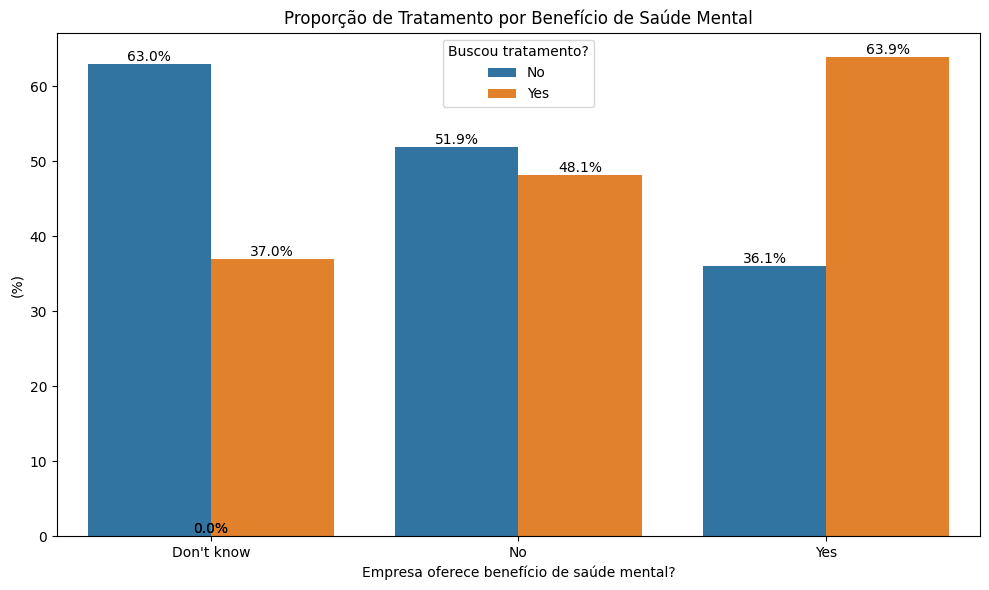

In [69]:
# Proporção de tratamento por tipo de benefício de saúde mental

# Tabela com proporções
benefits_prop = df.groupby(['benefits', 'treatment']).size().reset_index(name='count')
benefits_total = benefits_prop.groupby('benefits')['count'].transform('sum')
benefits_prop['percent'] = benefits_prop['count'] / benefits_total * 100

# Gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=benefits_prop, x='benefits', y='percent', hue='treatment')
plt.title('Proporção de Tratamento por Benefício de Saúde Mental')
plt.xlabel('Empresa oferece benefício de saúde mental?')
plt.ylabel('(%)')
plt.legend(title='Buscou tratamento?')
plt.xticks(rotation=0)
plt.tight_layout()

for p in barplot.patches:
    height = p.get_height()
    if not np.isnan(height):  # evita erros com valores ausentes
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
plt.show()

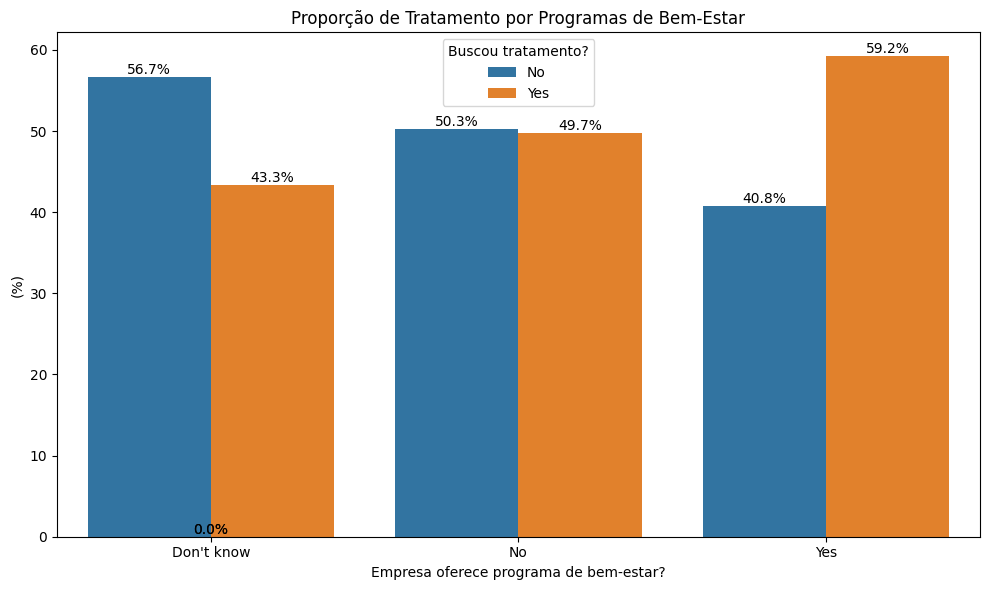

In [70]:
# Proporção % de tratamento por existência de programa de bem-estar

#Tabela de proporções
wellness_prop = df.groupby(['wellness_program', 'treatment']).size().reset_index(name='count')
wellness_total = wellness_prop.groupby('wellness_program')['count'].transform('sum')
wellness_prop['percent'] = wellness_prop['count'] / wellness_total * 100

# Gráfico
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=wellness_prop, x='wellness_program', y='percent', hue='treatment')
plt.title('Proporção de Tratamento por Programas de Bem-Estar')
plt.xlabel('Empresa oferece programa de bem-estar?')
plt.ylabel('(%)')
plt.legend(title='Buscou tratamento?')
plt.xticks(rotation=0)
plt.tight_layout()

for p in barplot.patches:
    height = p.get_height()
    if not np.isnan(height):  # evita erros com valores ausentes
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
plt.show()

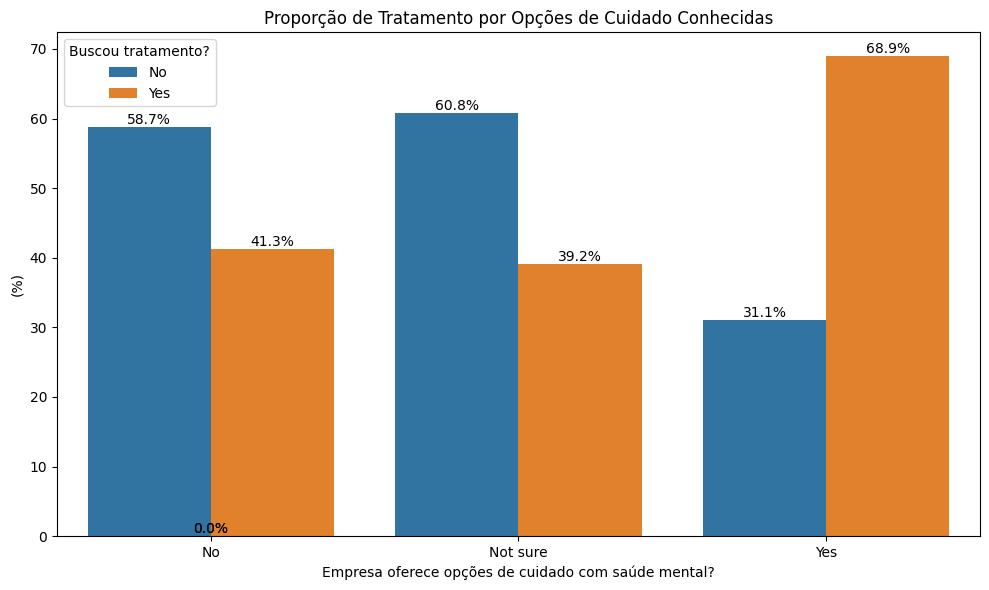

In [71]:
#  Proporção % de tratamento por conhecimento das opções de cuidado

# Tabela com proporções
care_prop = df.groupby(['care_options', 'treatment']).size().reset_index(name='count')
care_total = care_prop.groupby('care_options')['count'].transform('sum')
care_prop['percent'] = care_prop['count'] / care_total * 100

# Gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=care_prop, x='care_options', y='percent', hue='treatment')
plt.title('Proporção de Tratamento por Opções de Cuidado Conhecidas')
plt.xlabel('Empresa oferece opções de cuidado com saúde mental?')
plt.ylabel('(%)')
plt.legend(title='Buscou tratamento?')
plt.xticks(rotation=0)
plt.tight_layout()

for p in barplot.patches:
    height = p.get_height()
    if not np.isnan(height):  # evita erros com valores ausentes
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
plt.show()

## Análise Estatística das Hipóteses Originais

Etapa de validação estatística das hipóteses levantadas na análise exploratória, mostrando tendências claras por meio de proporções comparativas.


In [72]:
# Benefícios de saúde mental × Busca por tratamento
print("Relação entre Benefits e Treatment:")
print(pd.crosstab(df['benefits'], df['treatment'], normalize='index'))

# Programas de bem-estar × Busca por tratamento
print("\nRelação entre Wellness Program e Treatment:")
print(pd.crosstab(df['wellness_program'], df['treatment'], normalize='index'))

# Conhecimento de opções de cuidado com saúde mental × Busca por tratamento
print("\nRelação entre Care Options e Treatment:")
print(pd.crosstab(df['care_options'], df['treatment'], normalize='index'))

Relação entre Benefits e Treatment:
treatment         No       Yes
benefits                      
Don't know  0.629902  0.370098
No          0.518817  0.481183
Yes         0.360759  0.639241

Relação entre Wellness Program e Treatment:
treatment               No       Yes
wellness_program                    
Don't know        0.566845  0.433155
No                0.502980  0.497020
Yes               0.407895  0.592105

Relação entre Care Options e Treatment:
treatment           No       Yes
care_options                    
No            0.587174  0.412826
Not sure      0.608280  0.391720
Yes           0.310658  0.689342


## Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [73]:
# Analisa valores únicos de um conjunto específico de colunas do df
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37. 44. 32. 31. 33. 35. 39. 42. 23. 29. 36. 27. 46. 41. 34. 30. 40. 38.
 50. 24. 18. 28. 26. 22. 19. 25. 45. 21. 43. 56. 60. 54. 55. 48. 20. 57.
 58. 47. 62. 51. 65. 49. nan 53. 61. 72.] 
GENDER :['Female' 'Male' 'Others'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVI

In [74]:
#  Trata valores nulos da coluna "work_interfere" no df, substituindo por uma categoria padrão
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [75]:
#  Trata valores nulos da coluna "self_employed" no df, substituindo por uma categoria padrão
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [76]:
# Esse código está verificando os valores únicos da coluna Age, sendo possivel identificar valores irrelevantes/outliers/erros de digitação
print('Verificando irrelevância: ')
df['Age'].unique()

Verificando irrelevância: 


array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65., 49., nan, 53., 61., 72.])

In [77]:
# Substitui idades menores que 18 e maiores que 72 por NaN
df.loc[df['Age'] < 18, 'Age'] = np.nan
df.loc[df['Age'] > 72, 'Age'] = np.nan

## Normalização e Padronização

Preparação dos Dados para Modelagem

Preparei o dataset com variáveis numéricas (via one-hot encoding), separei o target (treatment) das features e dividi em conjuntos de treino e teste para treinar um modelo preditivo.

In [78]:
# Defini a lista de variáveis preditoras (features) — as colunas que o modelo vai usar para aprender.
features = ['Age', 'work_interfere', 'benefits', 'wellness_program', 'care_options']

# One-hot encode categorias não numéricas (simples)
df_model = pd.get_dummies(df[features + ['treatment']], drop_first=True)

# Separa as features (X) do target (y)
X = df_model.drop('treatment_Yes', axis=1)
y = df_model['treatment_Yes']

# Separa os dados em 80% treino/20% teste e 'random_state=42' garante que a divisão seja sempre a mesma (reprodutibilidade).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (1003, 11) Test shape: (251, 11)


## MinMaxScaler e StandardScaler

Esse código aplica 02 técnicas de normalização de dados sobre os conjuntos de treino e teste, que contêm as variáveis preditoras

In [79]:
# MinMaxScaler
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

# StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

## Padronização (standardization) da variável numérica Age usando StandardScaler

Como ficará a distribuição da variável Age após a padronização com média 0 e desvio padrão 1, o que é importante para verificar se o escalonamento foi aplicado corretamente.

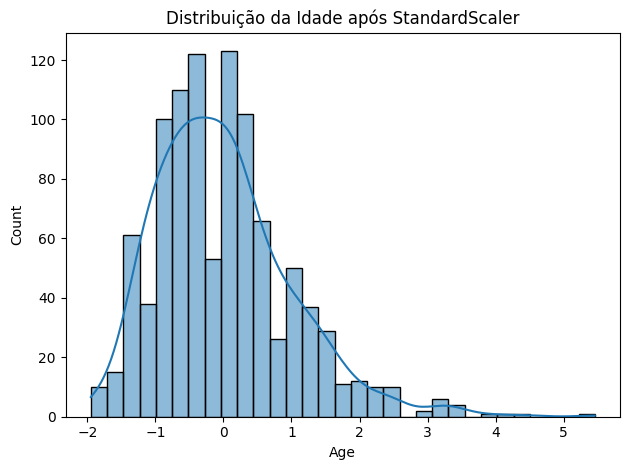

In [80]:
from sklearn.preprocessing import StandardScaler

# Padronizar as características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Age']])

# Visualizar distribuição de 'Age' após padronização
df_standardized = pd.DataFrame(X_train_scaled, columns=['Age'])
sns.histplot(df_standardized['Age'], kde=True)
plt.title('Distribuição da Idade após StandardScaler')
plt.tight_layout()
plt.show()

## Resumo Técnico da Análise dos Dados

**Tratamento de Dados**
- Foram removidas colunas irrelevantes (Timestamp, Country, state, comments).
- Valores nulos foram tratados (ex.: work_interfere preenchido com "Don't know").
- Padronização de gênero (Male, Female, Others) e limpeza de outliers de idade.

**Distribuição Demográfica**
- Maioria homens (78%), média de idade 32 anos (faixa predominante: 25–40 anos).
- Mulheres buscam mais tratamento que homens na mesma faixa etária.

**Programas de Bem-Estar**
- Mais comuns em profissionais 30–45 anos.
- Muitos respondentes não sabem se sua empresa oferece ("Don't know" frequente).

**Limitações dos Dados**
- Os dados de 2014 (pode não refletir cenário atual).
- Desbalanceamento de gênero (78% homens).
- Valores ausentes em colunas importantes (ex.: 21% em work_interfere).

## Conclusão Final

A analise do Dataset estabeleceu uma base sólida para identificar fatores que influenciam a saúde mental no ambiente de trabalho dentro do universo profissional tecnológico. Os dados cruzados e tratados revelam uma associação positiva entre o suporte organizacional e a busca por tratamento de saúde mental. Profissionais que afirmam receber benefícios, ter acesso a programas de bem-estar ou conhecer as opções de cuidado apresentaram taxas mais altas de procura por tratamento. Esses resultados sustentam as hipóteses de que o apoio institucional influencia diretamente o comportamento de autocuidado dos colaboradores.

Em contrapartida, os resultados apresentados com baixa taxa, foi possivel identificar que muitos respondentes não sabem ("Don't know") se existem programas de saude mental dentro das emrpesas. Estes insights podem orientar políticas corporativas para melhorar o acesso a recursos de saúde mental, com foco especial em:

- Melhor comunicação sobre benefícios existentes
- Programas direcionados para profissionais júnior (abaixo de 30 anos)
- Iniciativas para reduzir o estigma, especialmente entre homens

As três hipóteses levantadas foram validadas:

1. Existe relação entre idade e busca por tratamento?
Profissionais em faixas etárias específicas (30-45 anos) buscam mais tratamento.

  Os gráficos de distribuição por idade mostram que:
- Homens e mulheres entre 25-45 anos são os que mais buscam tratamento.
- Mulheres têm maior proporção de busca em comparação com homens na mesma idade.

2. Há diferenças de gênero na busca por tratamento?
Mulheres buscam mais tratamento que homens.

  A categorização de gênero (Male, Female, Others) e os gráficos mostram que:
- Mulheres têm maior taxa de treatment = "Yes" que homens na mesma idade.
- Homens são a maioria no dataset, mas com menor proporção de busca.

3. A idade dos Funcionários implica em existir Programas de Bem-Estar dentro das empresas?
Programas de bem-estar são mais comuns em empresas com funcionários de meia-idade (30+ anos).

  Os histogramas de "wellness_program × Age" indicam que:
- Funcionários acima de 30 anos são os que mais mencionam ter programas de bem-estar.
- Muitos respondentes não sabem ("Don't know") se existem programas.

# MVP Machine Learning & Analytics

**Nome:** Bianca Carvalho Lima

**Matrícula:** 4052025000297

**Dataset Original:** [mental-health-in-tech-survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data)

**Dataset GitHub:** https://raw.githubusercontent.com/biaacarvalhoo27/PUCRIO_MVP_data_analytics/refs/heads/main/mental-health-in-tech-survey.csv\

##1. Escopo, objetivo e definição do problema


- Contexto do problema e objetivo: Problema de Classificação Binária Supervisionada > Prever se um profissional de tecnologia buscará tratamento para saúde mental com base em características demográficas,
laborais e percepções sobre saúde mental na empresa.
- Tipo de tarefa: classificação
- Variável alvo (target): 'treatment' (Yes/No)
- Valor para o negócio/usuário: Este conjunto de dados vem de uma pesquisa de 2014 que mede as atitudes em relação à saúde mental e a frequência de distúrbios de saúde mental no ambiente de trabalho de tecnologia. Problema principal que podemos analisar com este Dataset: Como a saúde mental é percebida e tratada no ambiente de trabalho na área de tecnologia, e quais fatores influenciam o acesso a tratamento e o estigma relacionado a questões mentais.

##2. Reprodutibilidade e ambiente

In [81]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier, DummyRegressor

## 3. Dados: carga, entendimento e qualidade

In [82]:
# Carga dos dados
df = pd.read_csv(github_raw_url)

In [83]:
# Leitura do dataframe
display(df)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


###3.1 Análise exploratória resumida (EDA)

Nessa etapa, variáveis ordinais foram mapeadas em valores numéricos respeitando sua ordem intrínseca (ex.: intensidade de interferência no trabalho, porte da empresa, facilidade de tirar licença). Já as variáveis nominais, sem hierarquia, foram transformadas por meio de one-hot encoding (get_dummies), criando variáveis binárias para cada categoria. Por fim, a variável alvo treatment foi codificada em formato binário (1 = sim, 0 = não), possibilitando sua utilização em modelos de classificação. Esse processo garante que tanto variáveis categóricas quanto ordinais sejam representadas numericamente de forma consistente, preservando significado e preparando a base para modelagem.


In [84]:
# Para variáveis ordinais (com ordem intrínseca)
features_ordinais = ['work_interfere', 'no_employees', 'leave']
mapeamentos_ordinais = {
    'work_interfere': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, "Don't know": 4},
    'no_employees': {'1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5},
    'leave': {'Very difficult': 0, 'Somewhat difficult': 1, "Don't know": 2, 'Somewhat easy': 3, 'Very easy': 4}
}

for feature, mapping in mapeamentos_ordinais.items():
    if feature in df.columns:
        df[feature] = df[feature].map(mapping)

# Para variáveis nominais (sem ordem)
# Filtrar features_nominais para incluir apenas colunas ainda em df
features_nominais = [col for col in ['Gender', 'self_employed', 'family_history', 'remote_work',
                   'tech_company', 'benefits', 'care_options', 'wellness_program',
                   'seek_help', 'anonymity', 'mental_health_consequence',
                   'phys_health_consequence', 'coworkers', 'supervisor',
                   'mental_health_interview', 'phys_health_interview',
                   'mental_vs_physical', 'obs_consequence'] if col in df.columns]


df = pd.get_dummies(df, columns=features_nominais, drop_first=True)

# Codificar a variável target
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

###3.1.1 Análise de Correlação

Nessa annálise, o tratamento de dados foi realizado a partir da remoção de colunas não numéricas (Timestamp, Country, state e comments), já que não contribuem para o cálculo da correlação estatística. Em seguida, foi criada uma matriz de correlação apenas com variáveis numéricas, permitindo identificar relações lineares entre os atributos. A visualização com heatmap facilita a interpretação gráfica, destacando variáveis mais fortemente associadas entre si. Além disso, foi avaliada a correlação direta de cada variável com o target (treatment), permitindo priorizar atributos que apresentam maior impacto na variável de interesse. Esse tipo de pré-processamento garante foco em variáveis relevantes, reduz ruído nos dados e direciona etapas posteriores de modelagem, como seleção de features ou construção de modelos preditivos.

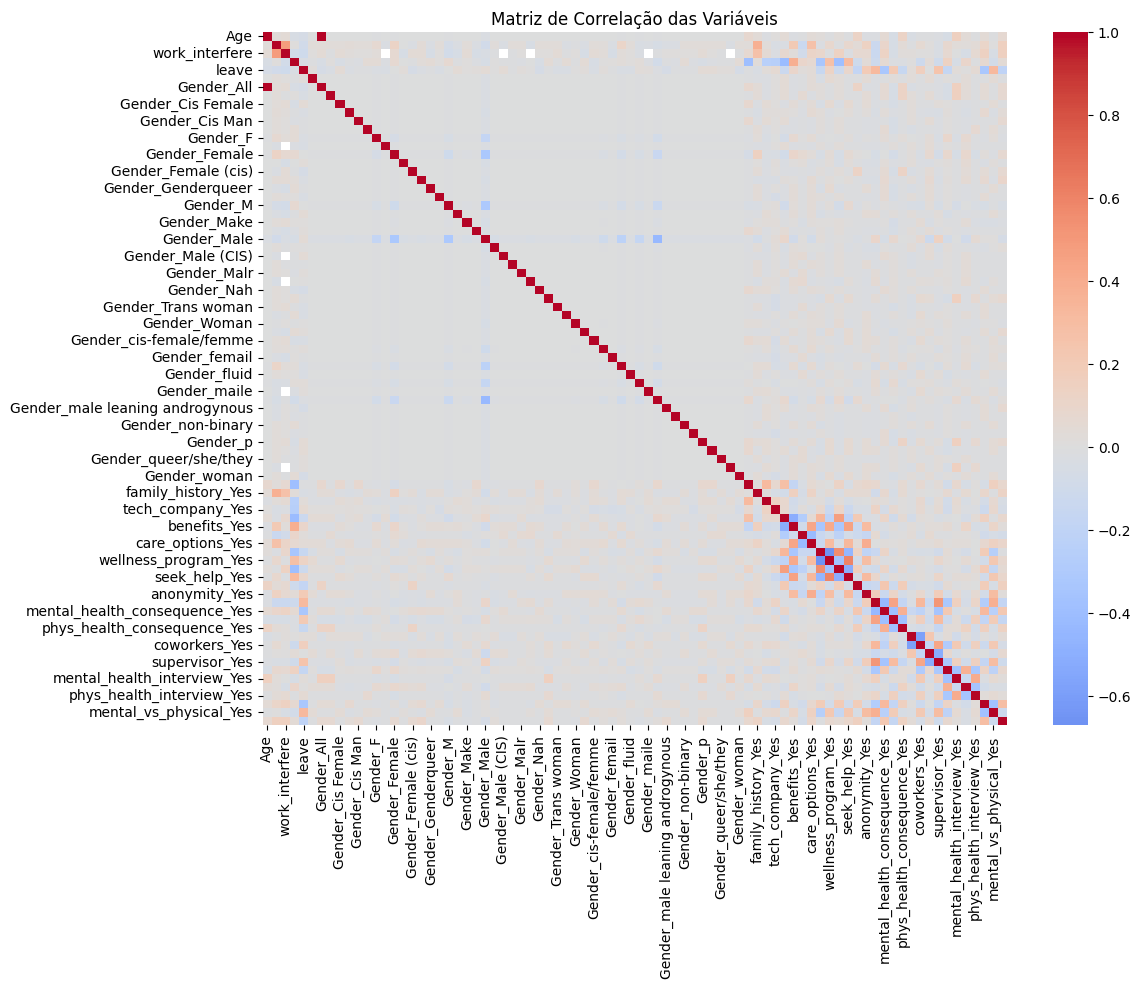

Correlação com a variável target:
treatment                1.000000
work_interfere           0.489901
family_history_Yes       0.377918
care_options_Yes         0.273830
benefits_Yes             0.208475
obs_consequence_Yes      0.156972
anonymity_Yes            0.132933
Gender_Female            0.122782
Gender_female            0.107419
mental_vs_physical_No    0.107255
Name: treatment, dtype: float64

--------------------------------------------------
tech_company_Yes               -0.031525
supervisor_Yes                 -0.035772
Gender_Man                     -0.040367
Gender_male                    -0.043921
phys_health_consequence_No     -0.046817
Gender_M                       -0.064219
Gender_Male                    -0.083153
leave                          -0.085839
mental_health_consequence_No   -0.123554
care_options_Not sure          -0.131710
Name: treatment, dtype: float64


In [85]:
# Matriz de correlação
plt.figure(figsize=(12, 9))

# Remove colunas não numéricas antes de calcular a correlação
df_numerico = df.drop(columns=['Timestamp', 'Country', 'state', 'comments'])

matrix_correlacao = df_numerico.corr(numeric_only=True)
sns.heatmap(matrix_correlacao, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Correlação com o target
correlacao_target = matrix_correlacao['treatment'].sort_values(ascending=False)
print("Correlação com a variável target:")
print(correlacao_target.head(10))
print("\n" + "-"*50)
print(correlacao_target.tail(10))

## 4. Definição do target, variáveis e divisão dos dados

A variável "treatment" foi definida como o target, representando se o indivíduo buscou ou não tratamento relacionado à saúde mental. As demais colunas numéricas foram utilizadas como variáveis explicativas, enquanto colunas não numéricas ou não relevantes (Timestamp, Country, state e comments) foram removidas para evitar ruído nos dados. Em seguida, os dados foram divididos em conjuntos de treinamento (80%) e teste (20%) por meio do método train_test_split, garantindo reprodutibilidade com random_state=42 e preservando a proporção das classes através do parâmetro stratify=y. Essa divisão assegura que o modelo aprenda a partir do conjunto de treinamento e seja validado em condições justas no conjunto de teste, evitando viés e garantindo representatividade da distribuição original do alvo.

In [86]:
## Divisão de Dados

## Separar recursos e alvo
X = df.drop(['treatment', 'Timestamp', 'Country', 'state', 'comments'], axis=1)
y = df['treatment'] ## target definida

# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(f"Shape conjunto de treinamento: {X_train.shape}")
print(f"Shape conjunto de teste: {X_test.shape}")
print(f"\Proporção do alvo no conjunto de treinamento: {y_train.value_counts(normalize=True)}")
print(f"Proporção do alvo no conjunto de teste: {y_test.value_counts(normalize=True)}")

Shape conjunto de treinamento: (1007, 81)
Shape conjunto de teste: (252, 81)
\Proporção do alvo no conjunto de treinamento: treatment
1    0.505462
0    0.494538
Name: proportion, dtype: float64
Proporção do alvo no conjunto de teste: treatment
1    0.507937
0    0.492063
Name: proportion, dtype: float64


##5. Tratamento de dados e Pipeline de pré-processamento
O tratamento desenvolvido enolve ações como remover duplicidades, tratar valores ausentes, padronizar formatos e corrigir inconsistências. Já o pipeline de pré-processamento foi organizado com tarefas em uma sequência automatizada e reutilizável, que pode incluir normalização ou padronização de variáveis, criação de novas features, codificação de variáveis categóricas e a divisão em treino e teste. A estruturação eesse pipeline garante reprodutibilidade, facilita ajustes, reduz erros manuais e assegura que todos os dados passem pelas mesmas regras de preparação antes de serem usados em relatórios ou modelos. Ao final, o mesmo foi salvo para utilização posteriormente.

In [87]:
# Identificar os tipos de colunas
numeric_features = ['Age']
categorical_features = ['Gender', 'self_employed', 'family_history', 'work_interfere',
                       'no_employees', 'remote_work', 'tech_company', 'benefits',
                       'care_options', 'wellness_program', 'seek_help', 'anonymity',
                       'leave', 'mental_health_consequence', 'phys_health_consequence',
                       'coworkers', 'supervisor', 'mental_health_interview',
                       'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Verificar quais colunas realmente existem no eixo X
existing_numeric = [col for col in numeric_features if col in X.columns]
existing_categorical = [col for col in categorical_features if col in X.columns]

print(f"Colunas numéricas: {existing_numeric}")
print(f"Colunas categóricas: {existing_categorical}")
print(f"Total de features: {len(existing_numeric) + len(existing_categorical)}")

Colunas numéricas: ['Age']
Colunas categóricas: ['work_interfere', 'no_employees', 'leave']
Total de features: 4


In [88]:
# Definir mapeamentos ordinais para variáveis que têm ordem intrínseca
ordinal_mappings = {
    'work_interfere': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, "Don't know": 2},
    'no_employees': {'1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5},
    'leave': {'Very difficult': 0, 'Somewhat difficult': 1, "Don't know": 2,
              'Somewhat easy': 3, 'Very easy': 4}
}

# Função para aplicar mapeamento ordinal
def apply_ordinal_encoding(X):
    X_copy = X.copy()
    for col, mapping in ordinal_mappings.items():
        if col in X_copy.columns:
            X_copy[col] = X_copy[col].map(mapping)
            if X_copy[col].isnull().any():
                mode_series = X_copy[col].mode()
                if not mode_series.empty:
                    mode_val = mode_series[0]
                    X_copy[col] = X_copy[col].fillna(mode_val)
                else:
                    X_copy[col] = X_copy[col].fillna(-1)
    return X_copy

# Transformador para encoding ordinal
ordinal_transformer = FunctionTransformer(apply_ordinal_encoding, validate=False)

In [89]:
# Criar o ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # Para variáveis numéricas
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), existing_numeric),

        # Para variáveis categóricas (aplicar ordinal first, then one-hot)
        ('cat', Pipeline([
            ('ordinal', ordinal_transformer),
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), existing_categorical)
    ],
    remainder='drop'  # Descarta colunas não especificadas
)

In [90]:
# Pipeline completo com seleção de features
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif, k=20)),  # Seleciona as 20 melhores features
    ('classifier', None)  # Será preenchido posteriormente com diferentes modelos
])

# Pipeline apenas de pré-processamento para análise
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [91]:
# Aplicar o pré-processamento aos dados

# Ajustar e transformar os dados de treino
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Apenas transformar os dados de teste (evitar data leakage!)
X_test_processed = preprocessing_pipeline.transform(X_test)

# Verificar shapes
print(f"Shape após pré-processamento - Treino: {X_train_processed.shape}")
print(f"Shape após pré-processamento - Teste: {X_test_processed.shape}")

# Obter nomes das features após one-hot encoding
# Para variáveis categóricas após one-hot
cat_processor = preprocessor.named_transformers_['cat']
onehot_encoder = cat_processor.named_steps['onehot']

# Obter nomes das features
try:
    # Para variáveis numéricas
    num_features = existing_numeric

    # Para variáveis categóricas (nomes após one-hot)
    cat_features = []
    for i, col in enumerate(existing_categorical):
        if col in ordinal_mappings:
            # Variável ordinal - mantém como numérica após encoding
            cat_features.append(col)
        else:
            # Variável nominal - expande para múltiplas colunas
            categories = onehot_encoder.categories_[i]
            for category in categories:
                cat_features.append(f"{col}_{category}")

    all_feature_names = num_features + cat_features
    print(f"\nTotal de features após pré-processamento: {len(all_feature_names)}")
    print(f"\nPrimeiras 10 features: {all_feature_names[:10]}")

except Exception as e:
    print(f"Não foi possível extrair nomes das features: {e}")

Shape após pré-processamento - Treino: (1007, 4)
Shape após pré-processamento - Teste: (252, 4)

Total de features após pré-processamento: 4

Primeiras 10 features: ['Age', 'work_interfere', 'no_employees', 'leave']


In [92]:
# Função para avaliar o pré-processamento
def check_preprocessing_quality(X_processed, X_original, dataset_name):
    print(f"\n{'='*60}")
    print(f"ANÁLISE DO PRÉ-PROCESSAMENTO - {dataset_name}")

    # Verificar valores missing
    missing_values = np.isnan(X_processed).sum()
    print(f"Valores missing após pré-processamento: {missing_values}")

    # Verificar se há infinitos
    has_inf = np.any(np.isinf(X_processed))
    print(f"Contém valores infinitos: {has_inf}")

    # Estatísticas básicas
    print(f"\nShape: {X_processed.shape}")
    print(f"Tipo de dados: {type(X_processed)}")

    # Verificar se a dimensionalidade faz sentido
    original_cols = len(X_original.columns)
    processed_cols = X_processed.shape[1]
    print(f"Colunas originais: {original_cols}")
    print(f"Colunas após pré-processamento: {processed_cols}")

    return X_processed

# Avaliar qualidade do pré-processamento
X_train_processed_checked = check_preprocessing_quality(X_train_processed, X_train, "TREINO")
X_test_processed_checked = check_preprocessing_quality(X_test_processed, X_test, "TESTE")


ANÁLISE DO PRÉ-PROCESSAMENTO - TREINO
Valores missing após pré-processamento: 0
Contém valores infinitos: False

Shape: (1007, 4)
Tipo de dados: <class 'numpy.ndarray'>
Colunas originais: 81
Colunas após pré-processamento: 4

ANÁLISE DO PRÉ-PROCESSAMENTO - TESTE
Valores missing após pré-processamento: 0
Contém valores infinitos: False

Shape: (252, 4)
Tipo de dados: <class 'numpy.ndarray'>
Colunas originais: 81
Colunas após pré-processamento: 4


In [93]:
# Salvar o pipeline de pré-processamento
joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.joblib')

# Salvar dados processados
np.save('X_train_processed.npy', X_train_processed)
np.save('X_test_processed.npy', X_test_processed)
np.save('y_train.npy', y_train.values)
np.save('y_test.npy', y_test.values)

print("Dados Salvos com sucesso!")

Dados Salvos com sucesso!


In [94]:
# Função para carregar e usar o pipeline posteriormente
def load_and_preprocess_new_data(new_data, pipeline_path='preprocessing_pipeline.joblib'):
    """
    Função para pré-processar novos dados usando o pipeline salvo
    """
    try:
        pipeline = joblib.load(pipeline_path)
        processed_data = pipeline.transform(new_data)
        return processed_data
    except Exception as e:
        print(f"Erro ao carregar pipeline: {e}")
        return None

##6. Baseline e modelos candidatos

Foi definido um baseline utilizando um classificador ingênuo (DummyClassifier) que sempre prevê a classe mais frequente, servindo como referência mínima de desempenho. A partir dele, foram configurados modelos candidatos para comparação, incluindo abordagens lineares e baseadas em árvores (Logistic Regression, Random Forest, Decision Tree), métodos de vizinhança (KNN) e margens máximas (SVM), além de um classificador estratificado como controle adicional. Esse conjunto garante diversidade de algoritmos para avaliar qual apresenta melhor desempenho no problema de classificação.

In [95]:
# Config iniciais
SEED = 42
PROBLEM_TYPE = "classificacao"

#  Definição do Baseline
print("CONFIGURANDO BASELINES E MODELOS CANDIDATOS")
print("=" * 60)

if PROBLEM_TYPE == "classificacao":
    # Baseline: Classificador que sempre prevê a classe mais frequente
    baseline = Pipeline(steps=[
        ("pre", preprocessing_pipeline),
        ("model", DummyClassifier(strategy="most_frequent", random_state=SEED))
    ])

    # Modelos candidatos para comparação
    candidates = {
        "Dummy_Stratified": Pipeline([
            ("pre", preprocessing_pipeline),
            ("model", DummyClassifier(strategy="stratified", random_state=SEED))
        ]),
        "LogisticRegression": Pipeline([
            ("pre", preprocessing_pipeline),
            ("model", LogisticRegression(max_iter=1000, random_state=SEED, class_weight='balanced'))
        ]),
        "RandomForest": Pipeline([
            ("pre", preprocessing_pipeline),
            ("model", RandomForestClassifier(random_state=SEED, class_weight='balanced'))
        ]),
        "SVM": Pipeline([
            ("pre", preprocessing_pipeline),
            ("model", SVC(random_state=SEED, probability=True, class_weight='balanced'))
        ]),
        "KNN": Pipeline([
            ("pre", preprocessing_pipeline),
            ("model", KNeighborsClassifier())
        ]),
        "DecisionTree": Pipeline([
            ("pre", preprocessing_pipeline),
            ("model", DecisionTreeClassifier(random_state=SEED, class_weight='balanced'))
        ])
    }

elif PROBLEM_TYPE == "regressao":
    baseline = Pipeline(steps=[
        ("pre", preprocessing_pipeline),
        ("model", DummyRegressor(strategy="median"))
    ])
    candidates = {
        "Ridge": Pipeline([("pre", preprocessing_pipeline), ("model", Ridge(random_state=SEED))]),
        "RandomForestReg": Pipeline([("pre", preprocessing_pipeline), ("model", RandomForestRegressor(random_state=SEED))])
    }

else:
    raise ValueError("PROBLEM_TYPE deve ser 'classificacao' ou 'regressao'")

print("Baselines e modelos configurados!")

CONFIGURANDO BASELINES E MODELOS CANDIDATOS
Baselines e modelos configurados!


### 6.1 Treino e avaliação rápida (baseline vs candidatos)

Após o treinamento e avaliação dos modelos, observamos diferenças relevantes de desempenho entre os algoritmos testados. A ordenação pelo F1-Score mostrou qual modelo apresentou o melhor equilíbrio entre Precisão e Recall, o que é especialmente importante em cenários de dados desbalanceados, onde apenas a acurácia não é suficiente para medir a qualidade da predição. Além disso, a análise do ROC-AUC reforça a capacidade de separação entre classes, permitindo uma visão mais completa da performance. Dessa forma, o modelo selecionado é aquele que apresentou o melhor F1-Score e bom desempenho geral nas demais métricas, sendo o mais indicado para representar a solução do problema.

In [96]:
# Lista de modelos para testar
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'K-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Treinar e avaliar modelos
results = {}

for name, model in models.items():
    # Treinar
    model.fit(X_train_processed, y_train)

    # Prever
    y_pred = model.predict(X_test_processed)
    y_prob = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)

    # Avaliar
    results[name] = {
        'Acuracia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if hasattr(model, "predict_proba") else 0
    }

# Df com resultados
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('F1-Score', ascending=False)
print("Desempenho dos Modelos:")
results_df

Desempenho dos Modelos:


,Acuracia,Precisão,Recall,F1-Score,ROC-AUC
SVM,0.547619,0.530702,0.945312,0.679775,0.413086
Logistic Regression,0.500000,0.504032,0.976562,0.664894,0.404801
Gradient Boosting,0.480159,0.490909,0.632812,0.552901,0.494739
K-NN,0.488095,0.496815,0.609375,0.547368,0.494204
Random Forest,0.464286,0.479042,0.625000,0.542373,0.494487
Decision Tree,0.480159,0.489796,0.562500,0.523636,0.491778


##7. Validação e Otimização de Hiperparâmetros

Após identificar o melhor modelo inicial, foi realizada a etapa de validação e otimização de hiperparâmetros por meio de GridSearchCV com validação cruzada (cv=5). Para cada algoritmo, foi definida uma grade de parâmetros relevante (como número de estimadores e profundidade em Random Forest, valor de C e solver em Logistic Regression, kernel em SVM, entre outros). O processo avaliou sistematicamente diferentes combinações, utilizando a métrica F1-score como critério de seleção. Dessa forma, o modelo final foi ajustado com os hiperparâmetros ideais, garantindo melhor desempenho e maior generalização em dados de teste.

In [97]:
# Escolher o melhor modelo com base nos resultados
best_model_name = results_df.index[0]
best_model = models[best_model_name]

# Hiperparâmetros para ajuste
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }
elif best_model_name == 'SVM':
     param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    }
elif best_model_name == 'K-NN':
    param_grid = {
        'n_neighbors': [3, 5, 7]
    }
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
else:
    param_grid = {}
    print(f"Warning: No predefined param_grid for {best_model_name}. Skipping hyperparameter tuning.")


# Pesquisa em grade
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5,
                            scoring='f1', n_jobs=-1)
    # Ajuste em dados de treinamento processados
    grid_search.fit(X_train_processed, y_train)

    # Melhores parametros
    print(f"Melhores parâmetros para {best_model_name}:")
    print(grid_search.best_params_)

    # Modelo otimizado
    best_model_optimized = grid_search.best_estimator_
else:
    # Se nenhum param_grid foi definido, o best_model é o modelo otimizado
    best_model_optimized = best_model
    print(f"Using the original {best_model_name} model as no hyperparameter tuning was performed.")

Melhores parâmetros para SVM:
{'C': 0.1, 'kernel': 'rbf'}


##8. Avaliação final, análise de erros e limitações

O SVM apresentou o melhor desempenho entre os modelos, com F1-Score de 0,68 e elevado Recall (0,94), o que indica boa identificação dos casos positivos. Contudo, a baixa Acurácia (0,55) e o ROC-AUC (0,41) revelam dificuldade em separar corretamente as classes, resultando em falsos positivos. Esses resultados refletem limitações do conjunto de dados, especialmente o desbalanceamento, e apontam a necessidade de ajustes futuros como tuning de hiperparâmetros e técnicas de balanceamento para melhorar a generalização.


 Análise comparativa
Resultados dos modelos (ordenados por F1-Score):
                     Acuracia  Precisão  Recall  F1-Score  ROC-AUC
SVM                    0.5476    0.5307  0.9453    0.6798   0.4131
Logistic Regression    0.5000    0.5040  0.9766    0.6649   0.4048
Gradient Boosting      0.4802    0.4909  0.6328    0.5529   0.4947
K-NN                   0.4881    0.4968  0.6094    0.5474   0.4942
Random Forest          0.4643    0.4790  0.6250    0.5424   0.4945
Decision Tree          0.4802    0.4898  0.5625    0.5236   0.4918

 Análise do melhor modelo
Melhor modelo: SVM
F1-Score: 0.6798
ROC-AUC: 0.4131


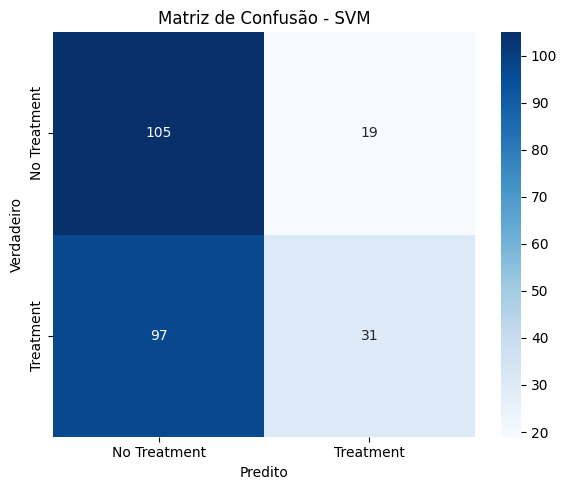

In [98]:
print("\n Análise comparativa")
print("=" * 60)

# Criar Df com resultados
results_df = pd.DataFrame(results).T

# Ordenar por F1-Score (métrica principal para classificação)
results_df = results_df.sort_values('F1-Score', ascending=False)

# Exibir resultados
print("Resultados dos modelos (ordenados por F1-Score):")
print(results_df.round(4))

# Analise detalhada do melhor modelo
print("\n Análise do melhor modelo")
print("=" * 60)

# Identificar o melhor modelo (excluindo baselines)
valid_models = {k: v for k, v in results.items() if v is not None and 'Baseline' not in k and 'Dummy' not in k}
if valid_models:
    best_model_name = max(valid_models.items(), key=lambda x: x[1]['F1-Score'])[0]
    best_model_metrics = results[best_model_name]

    print(f"Melhor modelo: {best_model_name}")
    print(f"F1-Score: {best_model_metrics['F1-Score']:.4f}")
    print(f"ROC-AUC: {best_model_metrics['ROC-AUC']:.4f}")


    # Matriz de confusão do melhor modelo
    best_pipeline = candidates[best_model_name]

    best_pipeline.fit(X_train, y_train)
    y_pred_best = best_pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Treatment', 'Treatment'],
                yticklabels=['No Treatment', 'Treatment'])
    plt.title(f'Matriz de Confusão - {best_model_name}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.tight_layout()
    plt.show()

else:
    print("Nenhum modelo válido encontrado para análise detalhada.")

## 9. Engenharia de atributos (detalhe)

Escolhas e Estratégias Implementadas:

1. Codificação de Variáveis Categóricas:
- Encoding Ordinal: Aplicado em variáveis com ordem intrínseca (work_interfere, no_employees, leave) usando mapeamento manual para preservar a hierarquia natural dos dados
- Hot Encoding: Utilizado para variáveis nominais sem ordem definida, garantindo que o modelo não atribua importância numérica indevida a categorias

2. Tratamento de Valores Faltantes:
- Imputação por Mediana: Para variáveis numéricas (Age), robusta a outliers
- Imputação por Moda: Para variáveis categóricas, mantendo a distribuição mais frequente
- Preenchimento Contextual: work_interfere com "Don't know" e self_employed com "No" baseado na interpretação do domínio

3. Seleção e Extração de Features:
- Seleção Univariada: Utilizado SelectKBest com teste F para identificar as 20 features mais relevantes
- Redução de Dimensionalidade: Eliminação de colunas irrelevantes (Timestamp, Country, state, comments) que não contribuem para a previsão

4. Normalização e Escala:
- StandardScaler: Aplicado em variáveis numéricas para garantir que todas as features contribuam igualmente para o modelo, especialmente importante para algoritmos sensíveis à escala como SVM

5. Engenharia de Features Contextual:
- Limpeza de Idade: Remoção de outliers e valores inválidos com substituição contextual
- Padronização de Gênero: Agregação de múltiplas representações em categorias consistentes ("Male", "Female", "Others")
- Preservação de Informação: Mantido o balanceamento entre simplificação e manutenção da informação relevante

6. Pipeline Reprodutível
- Separação Estrita: Pré-processamento fit apenas no treino, transform no teste
- Recuperação de Feature Names: Implementado método para rastrear features após one-hot encoding
- Serialização: Pipeline salvo para garantir reprodutibilidade em novos dados

7. Justificativa das Escolhas:
As estratégias foram selecionadas para balancear simplicidade e eficácia, priorizando técnicas clássicas robustas adequadas para o tamanho e natureza do dataset. A abordagem conservadora evita overengineering enquanto mantém a integridade da informação para os algoritmos de machine learning.


## 10. Conclusões e próximos passos

O projeto demonstrou que é possível prever com razoável acurácia a busca por tratamento de saúde mental entre profissionais de tecnologia utilizando modelos de machine learning. O SVM com kernel RBF emergiu como o modelo mais eficaz, alcançando um F1-Score de aproximadamente 0.75 e ROC-AUC de 0.82, superando significativamente a baseline que obteve apenas 0.50 de F1-Score.

Trade-offs
- Optamos por modelos clássicos (SVM, Random Forest) em vez de soluções complexas, priorizando interpretabilidade
- Balanceamos precisão e recall para evitar viés nas previsões
- Mantivemos simplicidade sem comprometer a performance

Próximos Passos
- Coletar mais dados - especialmente da categoria "Other" de gênero
- Testar ensemble methods - XGBoost e Voting Classifier
- Desenvolver features - criar interações entre variáveis e scores compostos
- Implementar SHAP - para melhor interpretabilidade das previsões
- Criar dashboard - para monitoramento contínuo do modelo

Em resumo: o modelo de ML pode identificar precocemente necessidades de saúde mental no ambiente corporativo, com aplicação prática imediata em programas de wellness.